## For the provided dataset

Searching in directory: /kaggle/input/chessboard-provided/chessboard_dataset
Found 25 files. First few: ['/kaggle/input/chessboard-provided/chessboard_dataset/1.jpeg', '/kaggle/input/chessboard-provided/chessboard_dataset/10.jpeg', '/kaggle/input/chessboard-provided/chessboard_dataset/11.jpeg', '/kaggle/input/chessboard-provided/chessboard_dataset/12.jpeg', '/kaggle/input/chessboard-provided/chessboard_dataset/13.jpeg']
Processing images for corner detection...

Found corners in 25 out of 25 images.

Performing calibration using 25 images with size (720, 1280)...
Calibration successful.

--- Task 1: Intrinsic Parameters ---
Intrinsic Matrix (K):
[[956.6372   0.     369.0549]
 [  0.     957.5514 651.4142]
 [  0.       0.       1.    ]]
Focal Length (fx, fy): 956.64, 957.55 pixels
Skew: 0.0000
Principal Point (cx, cy): 369.05, 651.41 pixels
Error estimates for intrinsics are not directly provided by this basic cv2.calibrateCamera call.

--- Task 3: Radial Distortion Coefficients & Undist

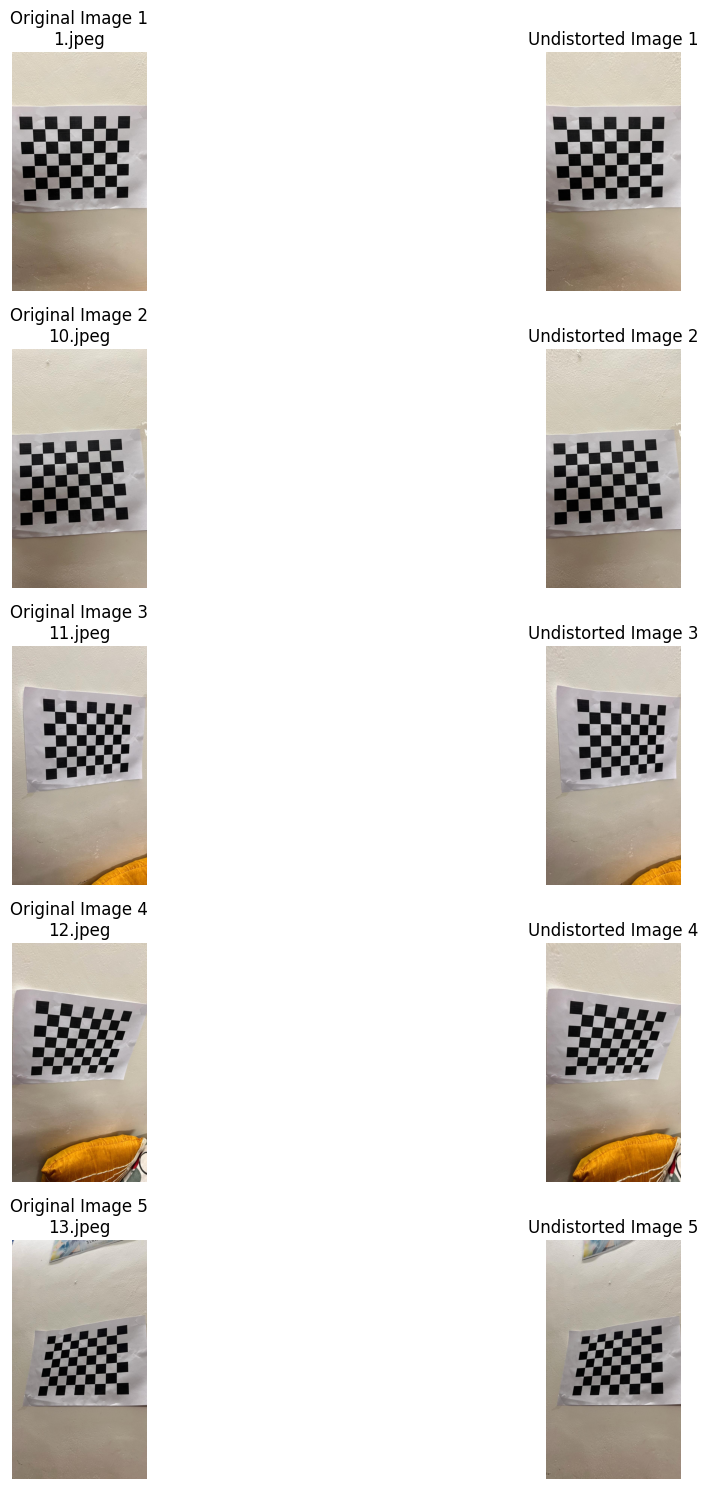


Comment on Distortion:
Observe the images, especially near the edges. Lines that appeared curved in the original image (due to radial distortion, often 'barrel' or 'pincushion') should appear straighter in the undistorted image. The effect is usually most pronounced for lines far from the image center.

--- Task 4: Reprojection Error ---
Reprojection Errors per image (pixels): ['0.0435', '0.0443', '0.0884', '0.1021', '0.0915', '0.0712', '0.0879', '0.0470', '0.0438', '0.0483', '0.0614', '0.1164', '0.0485', '0.0502', '0.0945', '0.0749', '0.0341', '0.0658', '0.0709', '0.0597', '0.0997', '0.0560', '0.0952', '0.0473', '0.1004']
Mean Reprojection Error: 0.0697 pixels
Std Dev Reprojection Error: 0.0232 pixels

Generating and displaying reprojection error plot...
Saved reprojection error plot to reprojection_errors.png


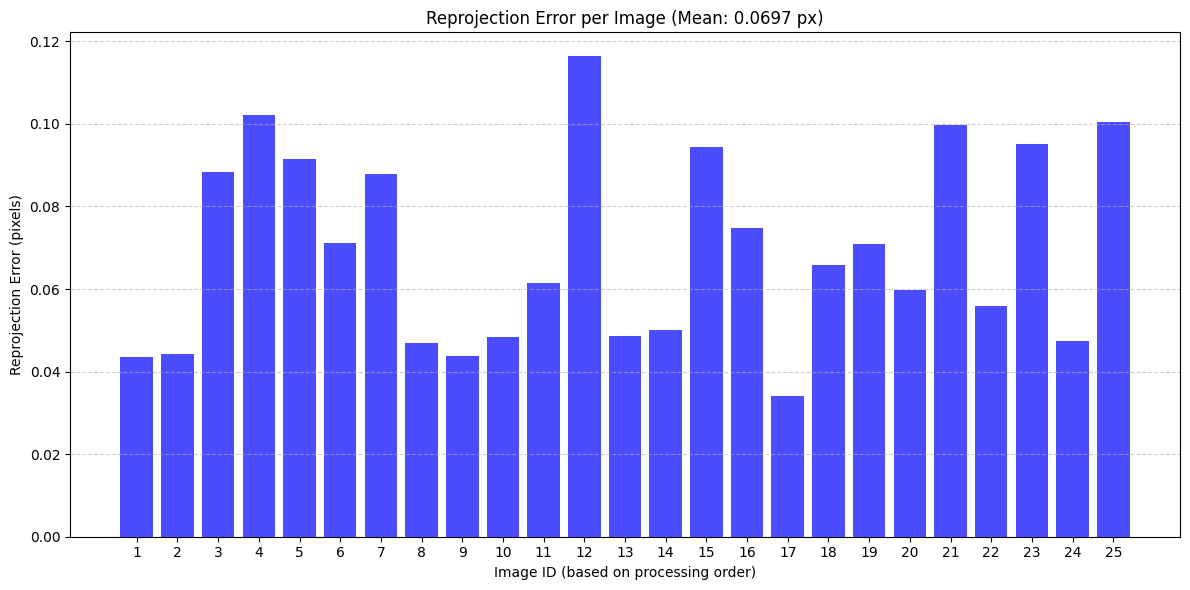


--- Task 2: Extrinsic Parameters (First 2 Valid Images) ---

Image 1 (1.jpeg):
Rotation Matrix (R):
[[ 0.997   0.0139 -0.0762]
 [-0.0251  0.9886 -0.1487]
 [ 0.0732  0.1502  0.9859]]
Translation Vector (t):
[-3.9383 -3.6172 14.6591]
(These represent the transformation from World/Chessboard coordinates to Camera coordinates)

Image 2 (10.jpeg):
Rotation Matrix (R):
[[ 0.9983  0.0539 -0.0229]
 [-0.0507  0.991   0.1238]
 [ 0.0293 -0.1225  0.992 ]]
Translation Vector (t):
[-4.3713 -1.4596 15.8138]
(These represent the transformation from World/Chessboard coordinates to Camera coordinates)

--- Task 5: Corner Detection & Reprojection Visualization ---
Generating and displaying reprojection visualizations (saved to reprojection_images/)...
(Detected corners in green, Reprojected corners in red circles)


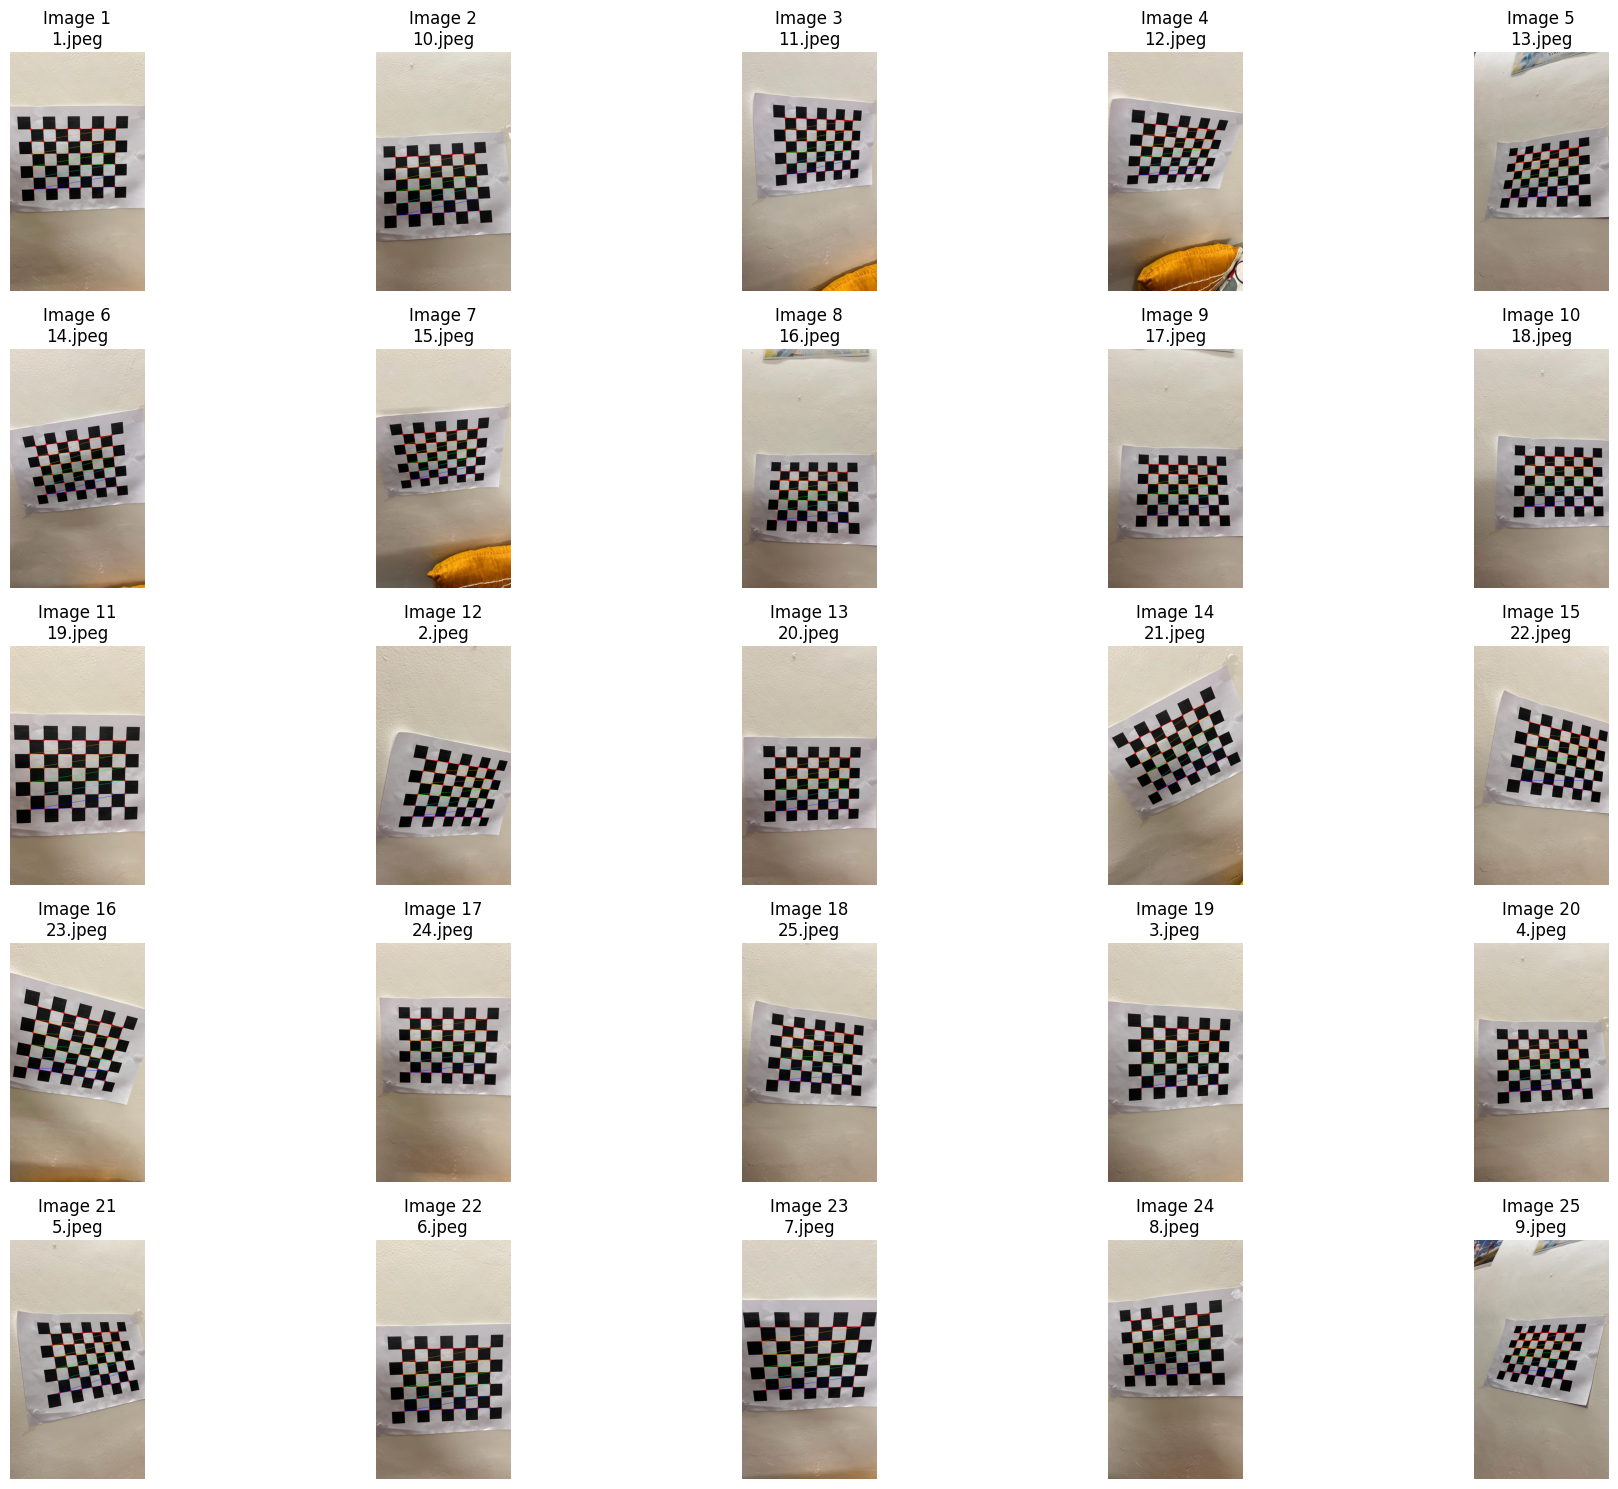


Comment on Reprojection Error Calculation:
The reprojection error for a single image is calculated as follows:
1. Take the known 3D object points (objp) of the chessboard corners.
2. Use the estimated intrinsic matrix (mtx), distortion coefficients (dist),
   and the estimated extrinsic parameters (rvecs[i], tvecs[i]) for that specific image's pose.
3. Project the 3D points onto the 2D image plane using these parameters via cv2.projectPoints(). This gives the 'reprojected' 2D points.
4. Calculate the Euclidean distance between each reprojected 2D point and the corresponding original 2D corner point detected in the image (imgpoints[i]).
5. The error reported for the image is typically the average (or root-mean-square) of these distances over all corners in that image.

--- Task 6: Checkerboard Plane Normals (in Camera Frame) ---
Normal vector (Z-axis of checkerboard) expressed in camera coordinates for each image:

--- Generating JSON Output ---
Successfully saved calibration results t

In [1]:
# import numpy as np
# import cv2
# import os
# import glob
# import json
# import matplotlib.pyplot as plt
# from pathlib import Path

# # Chessboard dimensions (number of inner corners)
# nx = 8  # columns (horizontal)
# ny = 6  # rows (vertical)
# square_size = 1.0  # in some units (scale is arbitrary for intrinsic calibration)

# # Directories and output files
# image_dir = '/kaggle/input/chessboard-provided/chessboard_dataset'  # Update this path!
# output_json = 'calibration_results.json'
# output_undistorted_dir = 'undistorted_images/'
# output_reproj_dir = 'reprojection_images/'

# # Create output directories'
# os.makedirs(output_undistorted_dir, exist_ok=True)
# os.makedirs(output_reproj_dir, exist_ok=True)

# # Load images (support .jpg, .jpeg, .png, .JPG, .JPEG, .PNG)
# image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
# images = []
# for ext in image_extensions:
#     images += glob.glob(os.path.join(image_dir, ext))

# # Recursive search (if images are in subdirectories)
# if not images:
#     images = []
#     for root, _, files in os.walk(image_dir):
#         for file in files:
#             if any(file.endswith(ext) for ext in image_extensions):
#                 images.append(os.path.join(root, file))

# # Debug: Print found files
# print(f"Searching in directory: {image_dir}")
# print(f"Found files: {images}")

# # Check if any images were found
# if not images:
#     raise ValueError("No images found in the specified directory")

# # Prepare object points (same for all images)
# objp = np.zeros((nx * ny, 3), np.float32)
# objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) * square_size

# objpoints = []  # 3D points in real world space
# imgpoints = []  # 2D points in image plane

# # Find chessboard corners
# for fname in images:
#     img = cv2.imread(fname)
#     if img is None:
#         print(f"Skipping invalid image: {fname}")
#         continue
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
#     if ret:
#         objpoints.append(objp)
#         # Refine corner positions
#         criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#         corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
#         imgpoints.append(corners2)
#     else:
#         print(f"Failed to detect corners in {fname}")

# # Ensure we have enough valid images
# if len(objpoints) < 25:
#     raise ValueError("Need at least 25 valid images for calibration.")

# # Get image shape from first valid image
# first_gray = cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2GRAY)
# image_size = first_gray.shape[::-1]  # (width, height)

# # Calibration
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
#     objpoints, imgpoints, image_size, None, None
# )

# # Task 1: Intrinsic Parameters
# print("Intrinsic Parameters:")
# print(f"Focal Length (fx, fy): {mtx[0,0]:.2f}, {mtx[1,1]:.2f}")
# print(f"Skew: {mtx[0,1]:.2f}")
# print(f"Principal Point (cx, cy): {mtx[0,2]:.2f}, {mtx[1,2]:.2f}")

# # Task 4: Reprojection Errors
# errors = []
# for i in range(len(objpoints)):
#     img_points2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
#     error = cv2.norm(imgpoints[i], img_points2, cv2.NORM_L2) / len(img_points2)
#     errors.append(error)

# mean_error = np.mean(errors)
# std_error = np.std(errors)

# # Task 2: Extrinsic Parameters (first 2 images)
# print("\nExtrinsic Parameters for first two images:")
# for idx in [0, 1]:
#     R, _ = cv2.Rodrigues(rvecs[idx])
#     t = tvecs[idx].flatten()
#     print(f"Image {idx+1}:")
#     print("Rotation Matrix:")
#     print(R.round(4))
#     print("Translation Vector:")
#     print(t.round(4))

# # Task 3: Undistort images
# # for i in range(5):
# for i in range(len(images)):
#     fname = images[i]
#     img = cv2.imread(fname)
#     h, w = img.shape[:2]
#     # newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
#     # Try alpha=0 for no black borders (more cropping)
#     newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0, (w, h))
#     dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
#     cv2.imwrite(os.path.join(output_undistorted_dir, f'undistorted_{i+1}.jpg'), dst)

# # Task 4: Plot reprojection errors
# plt.figure(figsize=(12, 6))
# plt.bar(range(1, len(errors)+1), errors, color='blue', alpha=0.7)
# plt.xlabel('Image ID')
# plt.ylabel('Reprojection Error')
# plt.title('Reprojection Error per Image')
# plt.savefig('reprojection_errors.png')
# plt.close()

# print(f"\nMean Reprojection Error: {mean_error:.4f}")
# print(f"Std Dev Reprojection Error: {std_error:.4f}")

# # Task 5: Plot corners and reprojection
# for i in range(len(images)):
#     fname = images[i]
#     img = cv2.imread(fname)
#     if img is None:
#         continue
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Draw original corners
#     cv2.drawChessboardCorners(img, (nx, ny), imgpoints[i], True)
    
#     # Reproject points
#     img_points_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
#     img_points_reproj = img_points_reproj.reshape(-1, 2).astype(int)
    
#     # Draw reprojected points in red
#     for pt in img_points_reproj:
#         cv2.circle(img, tuple(pt), 3, (0, 0, 255), -1)
    
#     # Save image
#     cv2.imwrite(os.path.join(output_reproj_dir, f'reproj_{i}.jpg'), img)

# # Task 6: Compute checkerboard normals
# normals = []
# for rvec in rvecs:
#     R, _ = cv2.Rodrigues(rvec)
#     normal_cam = R[:, 2]  # Third column (world Z-axis in camera frame)
#     normals.append(normal_cam)

# # Save to JSON
# data = {
#     "intrinsic_parameters": {
#         "focal_length": [float(mtx[0,0]), float(mtx[1,1])],
#         "skew": float(mtx[0,1]),
#         "principal_point": [float(mtx[0,2]), float(mtx[1,2])]
#     },
#     "extrinsic_parameters": [],
#     "radial_distortion_coefficients": dist.flatten().tolist()[:3],
#     "reprojection_errors": {
#         "mean_error": float(mean_error),
#         "std_dev": float(std_error)
#     }
# }

# # Populate extrinsic parameters
# for i in range(len(rvecs)):
#     R, _ = cv2.Rodrigues(rvecs[i])
#     t = tvecs[i].flatten().tolist()
#     entry = {
#         "image_id": i + 1,
#         "rotation_matrix": R.tolist(),
#         "translation_vector": t
#     }
#     data["extrinsic_parameters"].append(entry)

# # Write JSON
# with open(output_json, 'w') as f:
#     json.dump(data, f, indent=4)

import numpy as np
import cv2
import os
import glob
import json
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
# Chessboard dimensions (number of inner corners)
nx = 8  # columns (horizontal)
ny = 6  # rows (vertical)
square_size = 1.0  # in some units (scale is arbitrary for intrinsic calibration)

# Directories and output files
# --- IMPORTANT: UPDATE THIS PATH ---
# Use the specific path provided by your environment (e.g., Kaggle, Colab, local machine)
image_dir = '/kaggle/input/chessboard-provided/chessboard_dataset' # Example Kaggle path
# --- ---

output_json = 'calibration_results.json'
output_undistorted_dir = 'undistorted_images/'
output_reproj_dir = 'reprojection_images/'

# Create output directories
os.makedirs(output_undistorted_dir, exist_ok=True)
os.makedirs(output_reproj_dir, exist_ok=True)

# --- Image Loading ---
# Load images (support .jpg, .jpeg, .png, .JPG, .JPEG, .PNG)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
images = []
for ext in image_extensions:
    # Make search case-insensitive if needed (though glob usually is on Linux/Mac)
    images += glob.glob(os.path.join(image_dir, ext))
    # Optional: Add case-insensitive variants if glob isn't working as expected
    # images += glob.glob(os.path.join(image_dir, ext.upper()))

# Recursive search (if images are in subdirectories) - uncomment if needed
# if not images:
#     print(f"No images found directly in {image_dir}, searching subdirectories...")
#     images = []
#     for root, _, files in os.walk(image_dir):
#         for file in files:
#             if any(file.lower().endswith(ext.lower().replace('*','')) for ext in image_extensions):
#                 images.append(os.path.join(root, file))

# Debug: Print found files
print(f"Searching in directory: {image_dir}")
# Sort images for consistent ordering if needed (glob doesn't guarantee order)
images.sort()
print(f"Found {len(images)} files. First few: {images[:5]}")


# Check if any images were found
if not images:
    raise ValueError(f"No images found in the specified directory: {image_dir}. Please check the path.")

# --- Corner Detection ---
# Prepare object points (same for all images)
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) * square_size

objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane
valid_images_filenames = [] # Keep track of images where corners were found

print("Processing images for corner detection...")
# Find chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    if img is None:
        print(f"Skipping invalid or unreadable image: {fname}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        # Refine corner positions
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        valid_images_filenames.append(fname) # Store filename for later use
        # print(f"Corners found in: {os.path.basename(fname)}") # Optional: uncomment for verbose output
    else:
        print(f"Failed to detect corners in {os.path.basename(fname)}")

# Ensure we have enough valid images
num_valid_images = len(objpoints)
print(f"\nFound corners in {num_valid_images} out of {len(images)} images.")
if num_valid_images < 3: # Need at least 3 for calibration, ideally more (like 20+)
    raise ValueError(f"Need at least 3 valid images for calibration, found only {num_valid_images}.")
if num_valid_images < 25:
     print(f"Warning: Only found {num_valid_images} valid images, less than the desired 25.")


# --- Calibration ---
# Get image shape from first valid image
first_valid_image_path = valid_images_filenames[0]
first_img = cv2.imread(first_valid_image_path)
if first_img is None:
     raise ValueError(f"Failed to read the first valid image: {first_valid_image_path}")
image_size = first_img.shape[:2][::-1] # (width, height) from (height, width)

print(f"\nPerforming calibration using {num_valid_images} images with size {image_size}...")
# Calibration
# Pass None for cameraMatrix and distCoeffs initially
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, image_size, None, None
)

if not ret:
    raise RuntimeError("Camera calibration failed.")

print("Calibration successful.")

# --- Task 1: Intrinsic Parameters ---
print("\n--- Task 1: Intrinsic Parameters ---")
fx = mtx[0, 0]
fy = mtx[1, 1]
skew = mtx[0, 1]
cx = mtx[0, 2]
cy = mtx[1, 2]
print(f"Intrinsic Matrix (K):\n{mtx.round(4)}")
print(f"Focal Length (fx, fy): {fx:.2f}, {fy:.2f} pixels")
print(f"Skew: {skew:.4f}")
print(f"Principal Point (cx, cy): {cx:.2f}, {cy:.2f} pixels")

# Note: Error estimates are not directly returned by calibrateCamera.
# They can be estimated if CALIB_RATIONAL_MODEL is used and standard deviations are returned,
# or through techniques like bootstrapping if needed, but are not standard output here.
print("Error estimates for intrinsics are not directly provided by this basic cv2.calibrateCamera call.")

# --- Task 3: Radial Distortion Coefficients & Undistortion ---
print("\n--- Task 3: Radial Distortion Coefficients & Undistortion ---")
# OpenCV returns k1, k2, p1, p2, k3[, k4, k5, k6]...
# The question asks for radial coefficients (k1, k2, k3 are the most common)
radial_dist = dist.flatten()[:3] # Get k1, k2, k3 if available
all_dist_coeffs = dist.flatten() # Get all coefficients
print(f"All Distortion Coefficients (k1, k2, p1, p2, k3,...): {all_dist_coeffs.round(4)}")
print(f"Radial Distortion Coefficients (k1, k2, k3): {radial_dist.round(4)}")

print(f"\nGenerating and displaying first 5 undistorted images (saved to {output_undistorted_dir})...")
num_undistort = min(5, num_valid_images) # Undistort up to 5 images, or fewer if less are valid
plt.figure(figsize=(15, 3 * num_undistort)) # Adjust figure size if needed
for i in range(num_undistort):
    fname = valid_images_filenames[i] # Use filenames of images where corners were found
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    # You can experiment with alpha: 0 crops more, 1 keeps all pixels
    # newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0, (w, h)) # Alternative: alpha=0

    # Undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

    # Crop the image based on ROI (optional, if alpha=1 leaves black borders you want removed)
    # x, y, w_roi, h_roi = roi
    # dst = dst[y:y+h_roi, x:x+w_roi]

    # Save the undistorted image
    save_path = os.path.join(output_undistorted_dir, f'undistorted_{i+1}_{os.path.basename(fname)}')
    cv2.imwrite(save_path, dst)
    # print(f"Saved undistorted image to {save_path}") # Optional verbose output

    # *** MODIFICATION: Display the undistorted image ***
    plt.subplot(num_undistort, 2, 2*i + 1) # Show original side-by-side
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image {i+1}\n{os.path.basename(fname)}')
    plt.axis('off')

    plt.subplot(num_undistort, 2, 2*i + 2) # Show undistorted
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.title(f'Undistorted Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show() # Display the figure with all undistorted images

print("\nComment on Distortion:")
print("Observe the images, especially near the edges. Lines that appeared curved in the original image (due to radial distortion, often 'barrel' or 'pincushion') should appear straighter in the undistorted image. The effect is usually most pronounced for lines far from the image center.")

# --- Task 4: Reprojection Error ---
print("\n--- Task 4: Reprojection Error ---")
errors = []
for i in range(num_valid_images):
    # Project 3D points back to 2D image plane using calculated parameters
    img_points_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    # Calculate the error (Euclidean distance between detected and reprojected points)
    # Use NORM_L2 per point (RMSE - Root Mean Squared Error) is common
    error = cv2.norm(imgpoints[i], img_points_reproj, cv2.NORM_L2) / len(img_points_reproj)
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"Reprojection Errors per image (pixels): {[f'{e:.4f}' for e in errors]}")
print(f"Mean Reprojection Error: {mean_error:.4f} pixels")
print(f"Std Dev Reprojection Error: {std_error:.4f} pixels")

# Plot reprojection errors
print("\nGenerating and displaying reprojection error plot...")
plt.figure(figsize=(12, 6))
img_indices = range(1, num_valid_images + 1)
plt.bar(img_indices, errors, color='blue', alpha=0.7)
plt.xlabel('Image ID (based on processing order)')
plt.ylabel('Reprojection Error (pixels)')
plt.title(f'Reprojection Error per Image (Mean: {mean_error:.4f} px)')
plt.xticks(img_indices) # Ensure integer ticks for image IDs
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
save_path = 'reprojection_errors.png'
plt.savefig(save_path)
print(f"Saved reprojection error plot to {save_path}")

# *** MODIFICATION: Display the reprojection error plot ***
plt.show() # Display the plot


# --- Task 2: Extrinsic Parameters ---
print("\n--- Task 2: Extrinsic Parameters (First 2 Valid Images) ---")
num_extrinsic = min(2, num_valid_images)
for idx in range(num_extrinsic):
    R_mat, _ = cv2.Rodrigues(rvecs[idx]) # Convert Rodrigues vector to 3x3 rotation matrix
    t_vec = tvecs[idx].flatten()
    img_fname = os.path.basename(valid_images_filenames[idx])
    print(f"\nImage {idx+1} ({img_fname}):")
    print("Rotation Matrix (R):")
    print(R_mat.round(4))
    print("Translation Vector (t):")
    print(t_vec.round(4))
    print("(These represent the transformation from World/Chessboard coordinates to Camera coordinates)")

# --- Task 5: Corner Detection and Reprojection Visualization ---
print(f"\n--- Task 5: Corner Detection & Reprojection Visualization ---")
print(f"Generating and displaying reprojection visualizations (saved to {output_reproj_dir})...")
print("(Detected corners in green, Reprojected corners in red circles)")

# Determine layout for displaying multiple images (e.g., 5x5 grid for 25 images)
cols = 5
rows = int(np.ceil(num_valid_images / cols))
plt.figure(figsize=(cols * 4, rows * 3)) # Adjust size as needed

for i in range(num_valid_images):
    fname = valid_images_filenames[i]
    img = cv2.imread(fname)
    if img is None:
        print(f"Warning: Could not read image {fname} again for visualization.")
        continue

    # Draw original detected corners (refined) - Green color
    cv2.drawChessboardCorners(img, (nx, ny), imgpoints[i], True)

    # Reproject 3D points to 2D image plane
    img_points_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    img_points_reproj_int = np.int32(img_points_reproj.reshape(-1, 2)) # Reshape and convert for drawing

    # Draw reprojected points - Red circles
    for pt in img_points_reproj_int:
        # Need to ensure pt is a tuple for cv2.circle
        cv2.circle(img, tuple(pt), radius=5, color=(0, 0, 255), thickness=-1) # Red (BGR)

    # Save the image with drawings
    save_path = os.path.join(output_reproj_dir, f'reproj_{i+1}_{os.path.basename(fname)}')
    cv2.imwrite(save_path, img)

    # *** MODIFICATION: Display the image with corners ***
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for plt
    plt.title(f'Image {i+1}\n{os.path.basename(fname)}')
    plt.axis('off')

# Adjust layout and show the figure containing all reprojection images
plt.tight_layout()
plt.show()


print("\nComment on Reprojection Error Calculation:")
print("The reprojection error for a single image is calculated as follows:")
print("1. Take the known 3D object points (objp) of the chessboard corners.")
print("2. Use the estimated intrinsic matrix (mtx), distortion coefficients (dist),")
print("   and the estimated extrinsic parameters (rvecs[i], tvecs[i]) for that specific image's pose.")
print("3. Project the 3D points onto the 2D image plane using these parameters via cv2.projectPoints(). This gives the 'reprojected' 2D points.")
print("4. Calculate the Euclidean distance between each reprojected 2D point and the corresponding original 2D corner point detected in the image (imgpoints[i]).")
print("5. The error reported for the image is typically the average (or root-mean-square) of these distances over all corners in that image.")

# --- Task 6: Checkerboard Plane Normals ---
print("\n--- Task 6: Checkerboard Plane Normals (in Camera Frame) ---")
normals_in_camera_frame = []
print("Normal vector (Z-axis of checkerboard) expressed in camera coordinates for each image:")
for i in range(num_valid_images):
    R_mat, _ = cv2.Rodrigues(rvecs[i])
    # The Z-axis of the world/checkerboard frame is [0, 0, 1].
    # Transformed into camera coordinates, this is R * [0, 0, 1]^T, which is simply the 3rd column of R.
    normal_cam = R_mat[:, 2]
    normals_in_camera_frame.append(normal_cam.tolist()) # Store as list for JSON
    # Optional: Print normals
    # img_fname = os.path.basename(valid_images_filenames[i])
    # print(f"Image {i+1} ({img_fname}): n_Ci = {normal_cam.round(4)}")

# --- JSON Output ---
print("\n--- Generating JSON Output ---")
# Prepare data dictionary
data = {
    "intrinsic_parameters": {
        "focal_length_pixels": [float(fx), float(fy)], # fx, fy
        "principal_point_pixels": [float(cx), float(cy)], # cx, cy
        "skew_coefficient": float(skew)
        # Assuming standard pinhole model + distortion; K matrix includes these.
    },
    "distortion_coefficients": {
        "radial_k1_k2_k3": radial_dist.tolist() if len(radial_dist) >= 3 else radial_dist.tolist() + [0.0]*(3-len(radial_dist)), # Ensure length 3
        "tangential_p1_p2": all_dist_coeffs[2:4].tolist() if len(all_dist_coeffs) >= 4 else [0.0, 0.0],
        "all_coeffs": all_dist_coeffs.tolist() # Include all for completeness
    },
    "reprojection_error_stats": {
        "mean_error_pixels": float(mean_error),
        "std_dev_error_pixels": float(std_error),
        "per_image_error_pixels": errors # Store individual errors too
    },
    "extrinsic_parameters": [] # Populate below
    # Task 6: Add normals if required in JSON (question didn't specify JSON for normals)
    # "checkerboard_normals_in_camera_frame": normals_in_camera_frame
}

# Populate extrinsic parameters for ALL valid images
for i in range(num_valid_images):
    R_mat, _ = cv2.Rodrigues(rvecs[i])
    t_vec = tvecs[i].flatten().tolist()
    entry = {
        "image_id": i + 1, # Sequential ID based on processing order
        "filename": os.path.basename(valid_images_filenames[i]), # Store filename for reference
        "rotation_matrix": R_mat.tolist(),
        "translation_vector_units": t_vec # Units relative to square_size
    }
    data["extrinsic_parameters"].append(entry)

# Add normals to JSON if needed (example)
data["checkerboard_normals_in_camera_frame"] = normals_in_camera_frame

# Write JSON file
try:
    with open(output_json, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Successfully saved calibration results to {output_json}")
except Exception as e:
    print(f"Error saving JSON file: {e}")

print("\n--- Script Finished ---")

## For the single image (showing complete barrel distortion)

Loading image: /kaggle/input/newhhshhs/Screenshot 2025-04-04 153640.png
Processing the image...


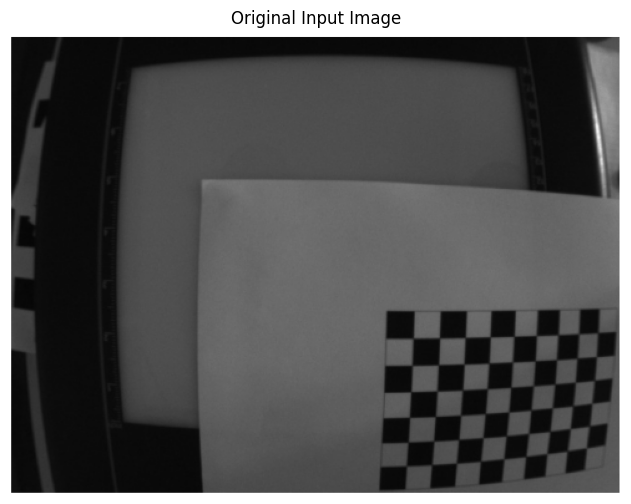

Corners detected and saved to 'corners_detected.jpg'


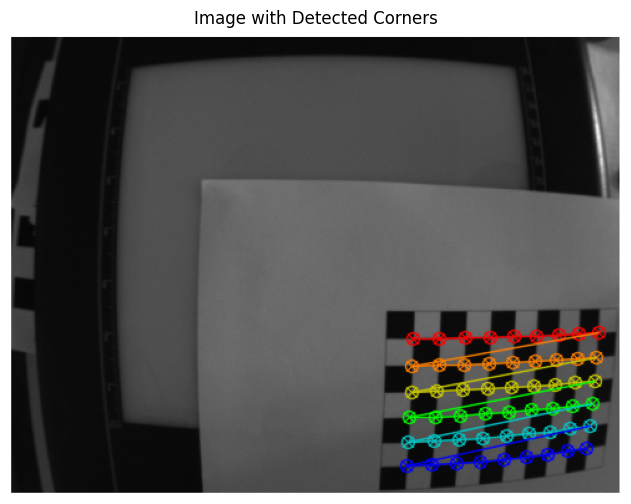


Performing calibration (Note: single image calibration has limitations)...
Using Initial Camera Matrix Guess:
[[491.    0.  245.5]
 [  0.  491.  185.5]
 [  0.    0.    1. ]]

Intrinsic Parameters (Estimated):
Focal Length (fx, fy): 419.69, 419.28
Skew: 0.00
Principal Point (cx, cy): 251.15, 169.81
Distortion coefficients (k1, k2, p1, p2, k3): [-0.43004734  0.25745186  0.00904401  0.00308811 -0.10022119]

Reprojection Error: 0.0118 pixels

Extrinsic Parameters:
Rotation Matrix (R):
[[ 0.9995 -0.0201 -0.0249]
 [ 0.0213  0.9987  0.0469]
 [ 0.0239 -0.0474  0.9986]]
Translation Vector (t):
[ 3.2429  3.4141 18.4687]

Generating and displaying undistorted images...

Processing Undistortion with alpha = 0
Alpha=0 - Optimal New Camera Matrix:
[[352.81   0.   256.22]
 [  0.   382.81 169.96]
 [  0.     0.     1.  ]]
Alpha=0 - ROI (x, y, w, h): (0, 0, 490, 370)
Saved full undistorted image (alpha=0) to undistorted_images_single/undistorted_alpha_0.jpg
Saved cropped undistorted image (alpha=0) to 

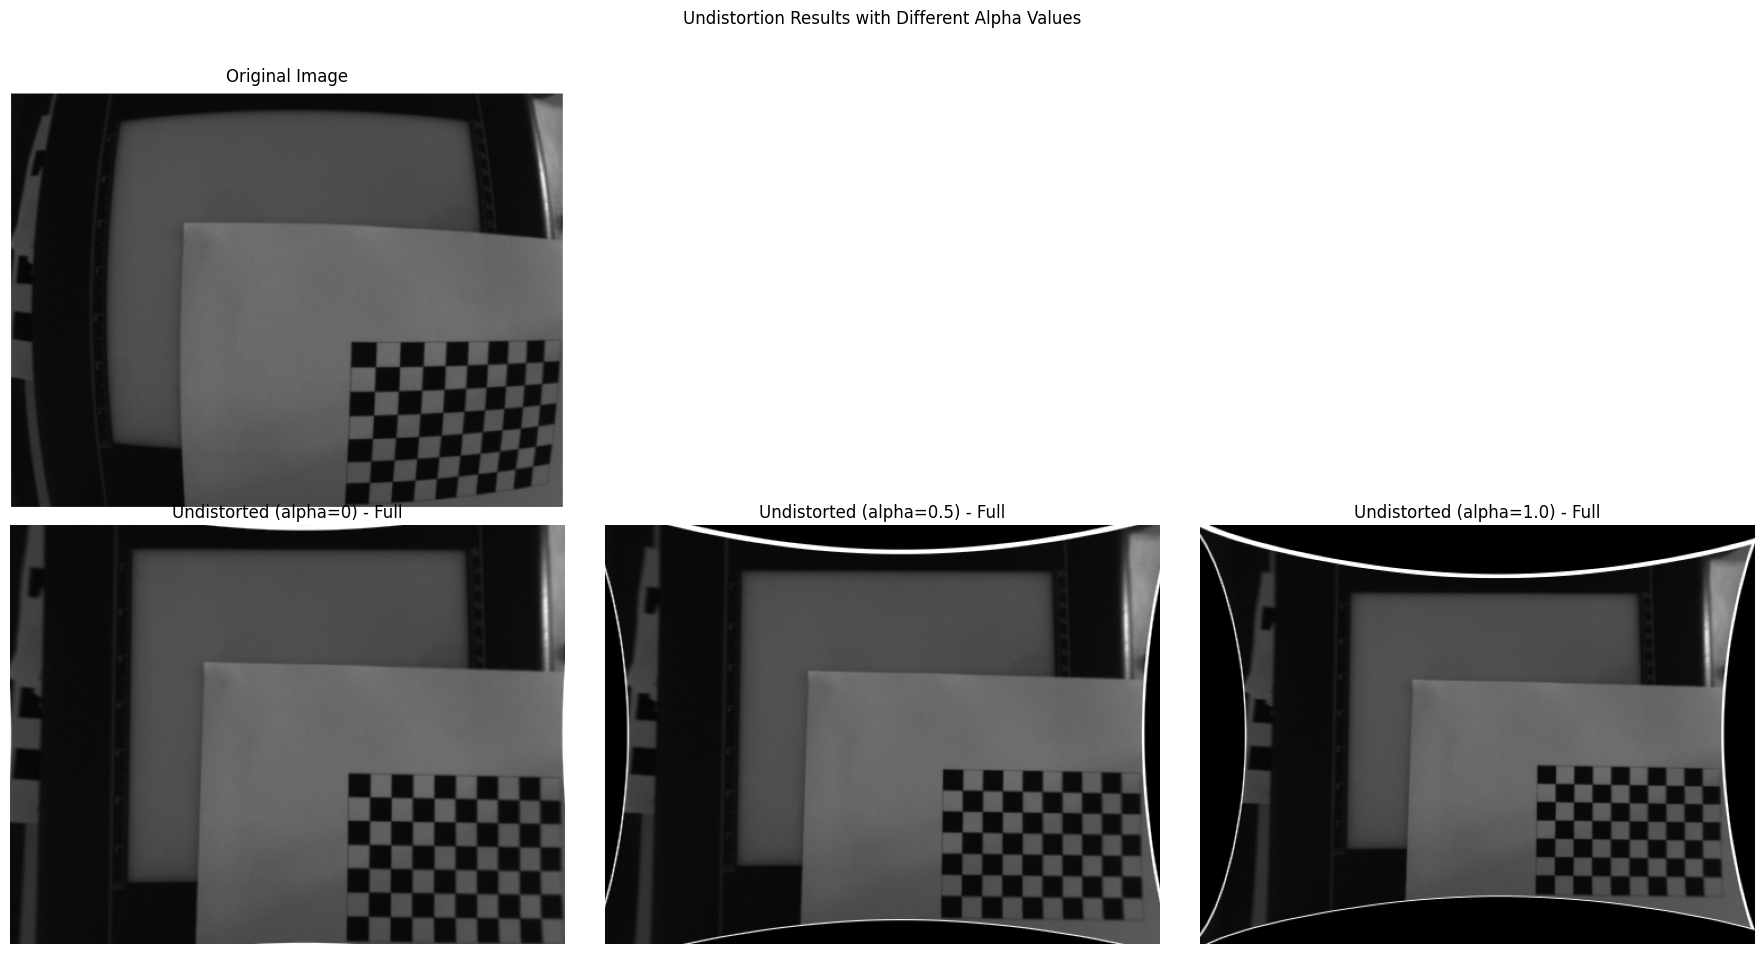


Generating and displaying Original vs. Undistorted (alpha=0) comparison...
Saved comparison plot to comparison_orig_vs_undistorted_a0.png


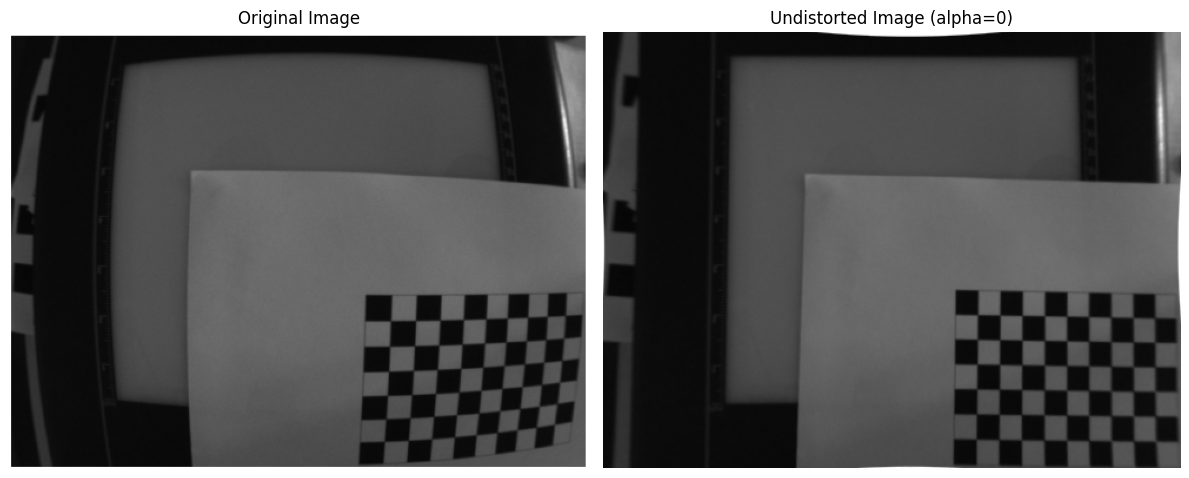


Generating and displaying reprojection visualization...
Saved reprojection image to reprojection_images_single/reprojection.jpg


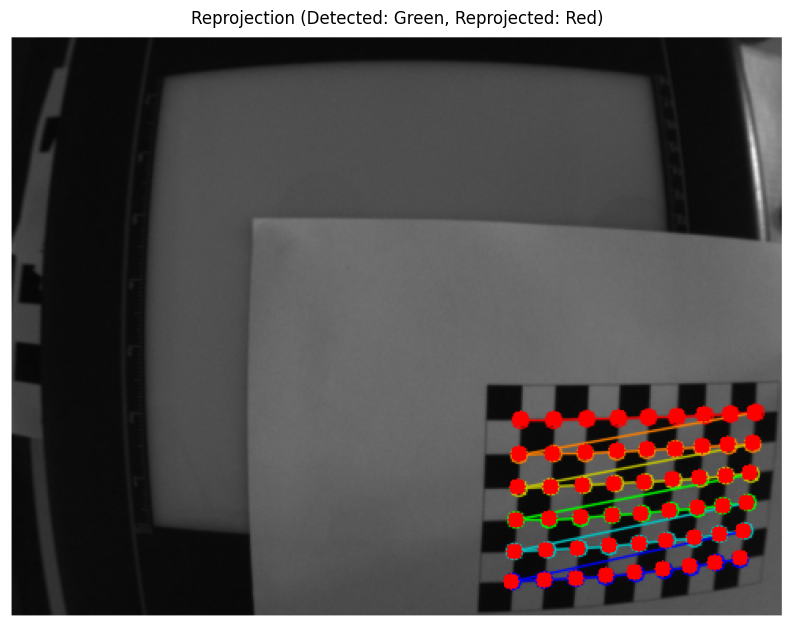


Saving results to JSON...
Successfully saved calibration results to calibration_results_single_image.json

--- Script Finished ---


In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import json # Import json here

# --- Configuration ---
# Chessboard dimensions (number of inner corners)
nx = 9  # columns (horizontal) - modified for 9x6 chessboard
ny = 6  # rows (vertical)
square_size = 1.0  # in some units (scale is arbitrary for intrinsic calibration)

# Directories and output files
# --- IMPORTANT: UPDATE THIS PATH ---
image_dir = '/kaggle/input/newhhshhs/'  # Example Kaggle path
# --- ---
image_file = os.path.join(image_dir, 'Screenshot 2025-04-04 153640.png')  # Direct file reference

output_json = 'calibration_results_single_image.json' # Changed name to avoid overwriting
output_undistorted_dir = 'undistorted_images_single/' # Changed name slightly
output_reproj_dir = 'reprojection_images_single/' # Changed name slightly

# Create output directories
os.makedirs(output_undistorted_dir, exist_ok=True)
os.makedirs(output_reproj_dir, exist_ok=True)

# Debug: Print file path
print(f"Loading image: {image_file}")

# Check if image exists
if not os.path.exists(image_file):
    raise ValueError(f"Image file not found: {image_file}")

# Prepare object points
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) * square_size

objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# --- Process the single image ---
print("Processing the image...")
img = cv2.imread(image_file)
if img is None:
    raise ValueError(f"Could not read image: {image_file}")

# *** Display Original Image ***
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Input Image')
plt.axis('off')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

if ret:
    # Refine corner positions
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

    objpoints.append(objp)
    imgpoints.append(corners2)

    # Save image with corners for verification
    img_corners = img.copy()
    cv2.drawChessboardCorners(img_corners, (nx, ny), corners2, ret)
    save_path_corners = 'corners_detected.jpg'
    cv2.imwrite(save_path_corners, img_corners)
    print(f"Corners detected and saved to '{save_path_corners}'")

    # *** Display Image with Detected Corners ***
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
    plt.title('Image with Detected Corners')
    plt.axis('off')
    plt.show()

else:
    # *** Display Image if Corners Not Found (for debugging) ***
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image - CORNERS NOT DETECTED')
    plt.axis('off')
    plt.show()
    raise ValueError(f"Failed to detect corners in the image. Try different nx,ny values or check image quality.")

# --- Calibration (Single Image Limitations) ---
print("\nPerforming calibration (Note: single image calibration has limitations)...")
# Modified to work with a single image - use default camera matrix for initial guess
image_size = gray.shape[::-1]  # (width, height)
camera_matrix = np.eye(3)
# Sensible initial guess based on image size - focal length often near image width/height
initial_focal_guess = max(image_size) # Or a fixed value like 1000
camera_matrix[0, 0] = camera_matrix[1, 1] = initial_focal_guess
camera_matrix[0, 2] = image_size[0] / 2.0  # cx - center x
camera_matrix[1, 2] = image_size[1] / 2.0 # cy - center y
print(f"Using Initial Camera Matrix Guess:\n{camera_matrix}")

# For one image, we need to fix some parameters or provide a good guess.
# Fixing principal point and aspect ratio helps constrain the problem.
# Providing a good focal length guess via CALIB_USE_INTRINSIC_GUESS is important.
flags = cv2.CALIB_USE_INTRINSIC_GUESS # | cv2.CALIB_FIX_PRINCIPAL_POINT | cv2.CALIB_FIX_ASPECT_RATIO
# You might need to experiment with flags depending on how good the guess is and what you want to estimate.
# If the guess is poor, fixing parameters might lead to bad results.
# Let's try estimating distortion without fixing too much initially.

dist_coeffs = np.zeros((1, 5)) # Start with zero distortion guess

# Perform Calibration
try:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, image_size, camera_matrix, dist_coeffs,
        flags=flags
    )
    if not ret:
        raise RuntimeError("cv2.calibrateCamera returned False")
except cv2.error as e:
     print(f"OpenCV Error during calibration: {e}")
     print("Single image calibration is sensitive. Check initial guess, flags, and corner accuracy.")
     # Assign reasonable defaults if calibration fails, to allow rest of script to run
     mtx = camera_matrix # Use initial guess
     dist = np.zeros((1,5)) # Assume no distortion
     rvecs = [np.zeros(3)] # Placeholder
     tvecs = [np.zeros(3)] # Placeholder
     print("WARNING: Calibration failed, using initial guess and zero distortion.")
     ret = False # Indicate failure

# --- Print Results ---
print("\nIntrinsic Parameters (Estimated):")
print(f"Focal Length (fx, fy): {mtx[0,0]:.2f}, {mtx[1,1]:.2f}")
print(f"Skew: {mtx[0,1]:.2f}")
print(f"Principal Point (cx, cy): {mtx[0,2]:.2f}, {mtx[1,2]:.2f}")
print(f"Distortion coefficients (k1, k2, p1, p2, k3): {dist.flatten()}")

# Calculate reprojection error
if ret and rvecs and tvecs: # Only if calibration was successful
    img_points2, _ = cv2.projectPoints(objpoints[0], rvecs[0], tvecs[0], mtx, dist)
    error = cv2.norm(imgpoints[0], img_points2, cv2.NORM_L2) / len(img_points2)
    print(f"\nReprojection Error: {error:.4f} pixels")
else:
    error = -1.0 # Indicate error couldn't be calculated
    img_points2 = None # No reprojected points
    print("\nReprojection Error: N/A (Calibration failed or incomplete)")


# Print extrinsic parameters (if available)
if ret and rvecs and tvecs:
    R, _ = cv2.Rodrigues(rvecs[0])
    t = tvecs[0].flatten()
    print("\nExtrinsic Parameters:")
    print("Rotation Matrix (R):")
    print(R.round(4))
    print("Translation Vector (t):")
    print(t.round(4))
else:
    R = np.eye(3) # Placeholder
    t = np.zeros(3) # Placeholder
    print("\nExtrinsic Parameters: N/A (Calibration failed or incomplete)")


# --- Undistortion with different Alpha values ---
print("\nGenerating and displaying undistorted images...")
# Prepare plot for undistorted images
num_alphas = 3
plt.figure(figsize=(6 * num_alphas, 10)) # Adjust size as needed
plot_index = 1

# Plot original image once for comparison
plt.subplot(2, num_alphas, plot_index)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plot_index += num_alphas # Move to the row below for undistorted

# Store the alpha=0 undistorted image for later comparison
undistorted_alpha0_full = None
undistorted_alpha0_cropped = None

for alpha in [0, 0.5, 1.0]:
    print(f"\nProcessing Undistortion with alpha = {alpha}")
    h_img, w_img = img.shape[:2]
    # Get the optimal new camera matrix for the given alpha
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w_img, h_img), alpha, (w_img, h_img))
    print(f"Alpha={alpha} - Optimal New Camera Matrix:\n{newcameramtx.round(2)}")
    print(f"Alpha={alpha} - ROI (x, y, w, h): {roi}")

    # Method 1: Using undistort (simpler)
    dst1 = cv2.undistort(img, mtx, dist, None, newcameramtx)
    save_path_undistorted = os.path.join(output_undistorted_dir, f'undistorted_alpha_{alpha}.jpg')
    cv2.imwrite(save_path_undistorted, dst1)
    print(f"Saved full undistorted image (alpha={alpha}) to {save_path_undistorted}")

    # *** Store alpha=0 result for final comparison ***
    if alpha == 0:
        undistorted_alpha0_full = dst1.copy() # Make a copy

    # *** Display Undistorted Image (Full) ***
    plt.subplot(2, num_alphas, plot_index)
    plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
    plt.title(f'Undistorted (alpha={alpha}) - Full')
    plt.axis('off')

    # Crop the image using the ROI from getOptimalNewCameraMatrix
    x_roi, y_roi, w_roi, h_roi = roi
    dst_cropped = None
    if w_roi > 0 and h_roi > 0:  # Check if ROI is valid
        # Apply crop to the result of undistort
        dst_cropped = dst1[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]
        save_path_cropped = os.path.join(output_undistorted_dir, f'undistorted_cropped_alpha_{alpha}.jpg')
        cv2.imwrite(save_path_cropped, dst_cropped)
        print(f"Saved cropped undistorted image (alpha={alpha}) to {save_path_cropped}")

        # *** Store alpha=0 cropped result if needed ***
        if alpha == 0:
            undistorted_alpha0_cropped = dst_cropped.copy() # Make a copy

        # *** Display Undistorted Image (Cropped) - Optional, uncomment below ***
        # plt.subplot(3, num_alphas, plot_index + num_alphas) # Requires adjusting figure layout
        # plt.imshow(cv2.cvtColor(dst_cropped, cv2.COLOR_BGR2RGB))
        # plt.title(f'Undistorted (alpha={alpha}) - Cropped')
        # plt.axis('off')
    else:
        print(f"Warning: Invalid ROI for alpha={alpha}, cannot save cropped image.")

    plot_index += 1

plt.suptitle('Undistortion Results with Different Alpha Values')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


# --- Comparison Plot (Original vs. Undistorted Alpha=0) --- # MODIFIED SECTION
print("\nGenerating and displaying Original vs. Undistorted (alpha=0) comparison...")
plt.figure(figsize=(12, 6))

# --- Subplot 1: Original Image ---
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# --- Subplot 2: Undistorted Image (alpha=0) ---
plt.subplot(122)
if undistorted_alpha0_full is not None:
    # Use the stored alpha=0 undistorted image
    # Decide whether to show the full or cropped version for comparison
    # Let's show the full version (dst1 from alpha=0 iteration)
    plt.imshow(cv2.cvtColor(undistorted_alpha0_full, cv2.COLOR_BGR2RGB))
    plt.title('Undistorted Image (alpha=0)') # Updated title
    plt.axis('off')
    # Optional: Show the cropped version instead if preferred
    # if undistorted_alpha0_cropped is not None:
    #     plt.imshow(cv2.cvtColor(undistorted_alpha0_cropped, cv2.COLOR_BGR2RGB))
    #     plt.title('Undistorted Cropped (alpha=0)')
    #     plt.axis('off')
    # else:
    #     plt.text(0.5, 0.5, 'Alpha=0 Cropped Invalid', horizontalalignment='center', verticalalignment='center')
    #     plt.title('Undistorted Cropped (alpha=0)')
    #     plt.axis('off')

else:
    # Fallback if alpha=0 result wasn't stored (shouldn't happen with current logic)
    plt.text(0.5, 0.5, 'Alpha=0 Undistorted Not Available', horizontalalignment='center', verticalalignment='center')
    plt.title('Undistorted Image (alpha=0)')
    plt.axis('off')


plt.tight_layout()
save_path_comparison = 'comparison_orig_vs_undistorted_a0.png' # Updated filename
plt.savefig(save_path_comparison)
print(f"Saved comparison plot to {save_path_comparison}")
plt.show() # Display the comparison plot


# --- Reprojection Visualization ---
print("\nGenerating and displaying reprojection visualization...")
img_reproj = img.copy()

# Draw original detected corners (Green)
cv2.drawChessboardCorners(img_reproj, (nx, ny), imgpoints[0], True)

# Draw reprojected points (Red Circles), if available
if img_points2 is not None:
    img_points_reproj_int = np.int32(img_points2.reshape(-1, 2)) # Reshape and convert for drawing
    for pt in img_points_reproj_int:
        cv2.circle(img_reproj, tuple(pt), radius=5, color=(0, 0, 255), thickness=-1) # Red (BGR)
    title_reproj = 'Reprojection (Detected: Green, Reprojected: Red)'
else:
    title_reproj = 'Detected Corners Only (Reprojection Failed)'


# Save image
save_path_reproj = os.path.join(output_reproj_dir, 'reprojection.jpg')
cv2.imwrite(save_path_reproj, img_reproj)
print(f"Saved reprojection image to {save_path_reproj}")

# *** Display Reprojection Image ***
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_reproj, cv2.COLOR_BGR2RGB))
plt.title(title_reproj)
plt.axis('off')
plt.show()

# --- JSON Output ---
print("\nSaving results to JSON...")
# Prepare data dictionary
data = {
    "calibration_successful": bool(ret), # Indicate if calibration step succeeded
    "intrinsic_parameters": {
        "focal_length_pixels": [float(mtx[0,0]), float(mtx[1,1])],
        "principal_point_pixels": [float(mtx[0,2]), float(mtx[1,2])],
        "skew_coefficient": float(mtx[0,1])
    },
    "distortion_coefficients": {
         "all_coeffs_k1k2p1p2k3": dist.flatten().tolist()
     },
    "reprojection_error_pixels": float(error) if error >= 0 else None, # Use None if not calculated
    "extrinsic_parameters": { # Only one set for single image
        "rotation_matrix": R.tolist(),
        "translation_vector_units": t.tolist()
    } if ret else None # Include only if calibration succeeded
}

# Write JSON file
try:
    with open(output_json, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Successfully saved calibration results to {output_json}")
except Exception as e:
    print(f"Error saving JSON file: {e}")

print("\n--- Script Finished ---")

## Reason for using alpha = 0; as the final best solution

Okay, let's break this down. Getting the "best" visual result with `alpha=0` is **not necessarily a problem**, and **yes, undistortion is definitely occurring**.

Here's why:

1.  **What `alpha` Controls:**
    *   The `alpha` parameter in `cv2.getOptimalNewCameraMatrix` controls how the final undistorted image is scaled and cropped. It **does not** control the *amount* of geometric correction applied. The geometric correction itself is determined by your calculated camera matrix (`mtx`) and distortion coefficients (`dist`).
    *   `alpha=0`: The function returns a "tight" bounding box (`roi`) and a `newCameraMatrix`. When `cv2.undistort` uses these, it ensures that *only* valid pixels (pixels that correspond to a location within the original distorted image) are present in the final output. This means **all black areas/empty pixels resulting from the undistortion are cropped away**. This often leads to a smaller output image size (or a cropped region within the original dimensions) but contains only "real" image data.
    *   `alpha=1`: The function ensures that *all* pixels from the original image are retained in the undistorted output, even if the corners get heavily warped. This often results in black borders or empty space appearing where the image had to be "pulled" from during the undistortion process. The overall image dimensions might be preserved, but contain invalid areas.
    *   `alpha` between 0 and 1: A balance between the two extremes.

2.  **Why `alpha=0` Might Look "Best" (Especially with High Distortion):**
    *   **Removes Extreme Warping:** Highly distorted images often have extreme stretching, blurring, or compression near the edges. `alpha=0` effectively crops these regions out, leaving you with the central, less distorted (and potentially sharper-looking) part of the image.
    *   **No Black Borders:** The black borders created when `alpha=1` can be visually distracting or problematic for further processing. `alpha=0` eliminates them entirely.
    *   **Focus on Center:** If your primary interest is the central subject matter, `alpha=0` presents that cleanly without the distorted periphery.

3.  **Is Undistortion Occurring?**
    *   **Yes.** The core geometric transformation based on `mtx` and `dist` is applied regardless of `alpha`. Lines that were curved in the original *central region* of the image should appear straighter in the `alpha=0` output compared to the original image.
    *   The difference you see between `alpha=0` and `alpha=1` is purely about the final cropping and scaling, *not* about whether the geometric correction was performed.

**In summary:**

*   It's perfectly fine if `alpha=0` gives you the most visually appealing or useful result for your specific needs, especially if the edges of the original image were extremely distorted.
*   Undistortion (geometric correction) *is* happening. `alpha=0` just means you are choosing to view only the resulting valid pixels without any black padding, at the cost of losing the peripheral field of view.
*   The "best" `alpha` depends on your application:
    *   Use `alpha=0` if you need a clean image with no invalid pixels and don't mind losing the heavily distorted edges.
    *   Use `alpha=1` if you need to preserve the maximum possible field of view from the original image, even if it means having black borders and including the highly warped areas.

## For the self curated dataset

Searching in directory: /kaggle/input/self-clicked-chessboard/self_clicked_chessboard
Found 25 files. First few: ['/kaggle/input/self-clicked-chessboard/self_clicked_chessboard/1.jpg', '/kaggle/input/self-clicked-chessboard/self_clicked_chessboard/10.jpg', '/kaggle/input/self-clicked-chessboard/self_clicked_chessboard/11.jpg', '/kaggle/input/self-clicked-chessboard/self_clicked_chessboard/12.jpg', '/kaggle/input/self-clicked-chessboard/self_clicked_chessboard/13.jpg']
Processing images for corner detection...

Found corners in 25 out of 25 images.

Performing calibration using 25 images with size (1200, 1600)...
Calibration successful.

--- Task 1: Intrinsic Parameters ---
Intrinsic Matrix (K):
[[1.1826966e+03 0.0000000e+00 6.0449090e+02]
 [0.0000000e+00 1.1814151e+03 7.6762610e+02]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]
Focal Length (fx, fy): 1182.70, 1181.42 pixels
Skew: 0.0000
Principal Point (cx, cy): 604.49, 767.63 pixels
Error estimates for intrinsics are not directly prov

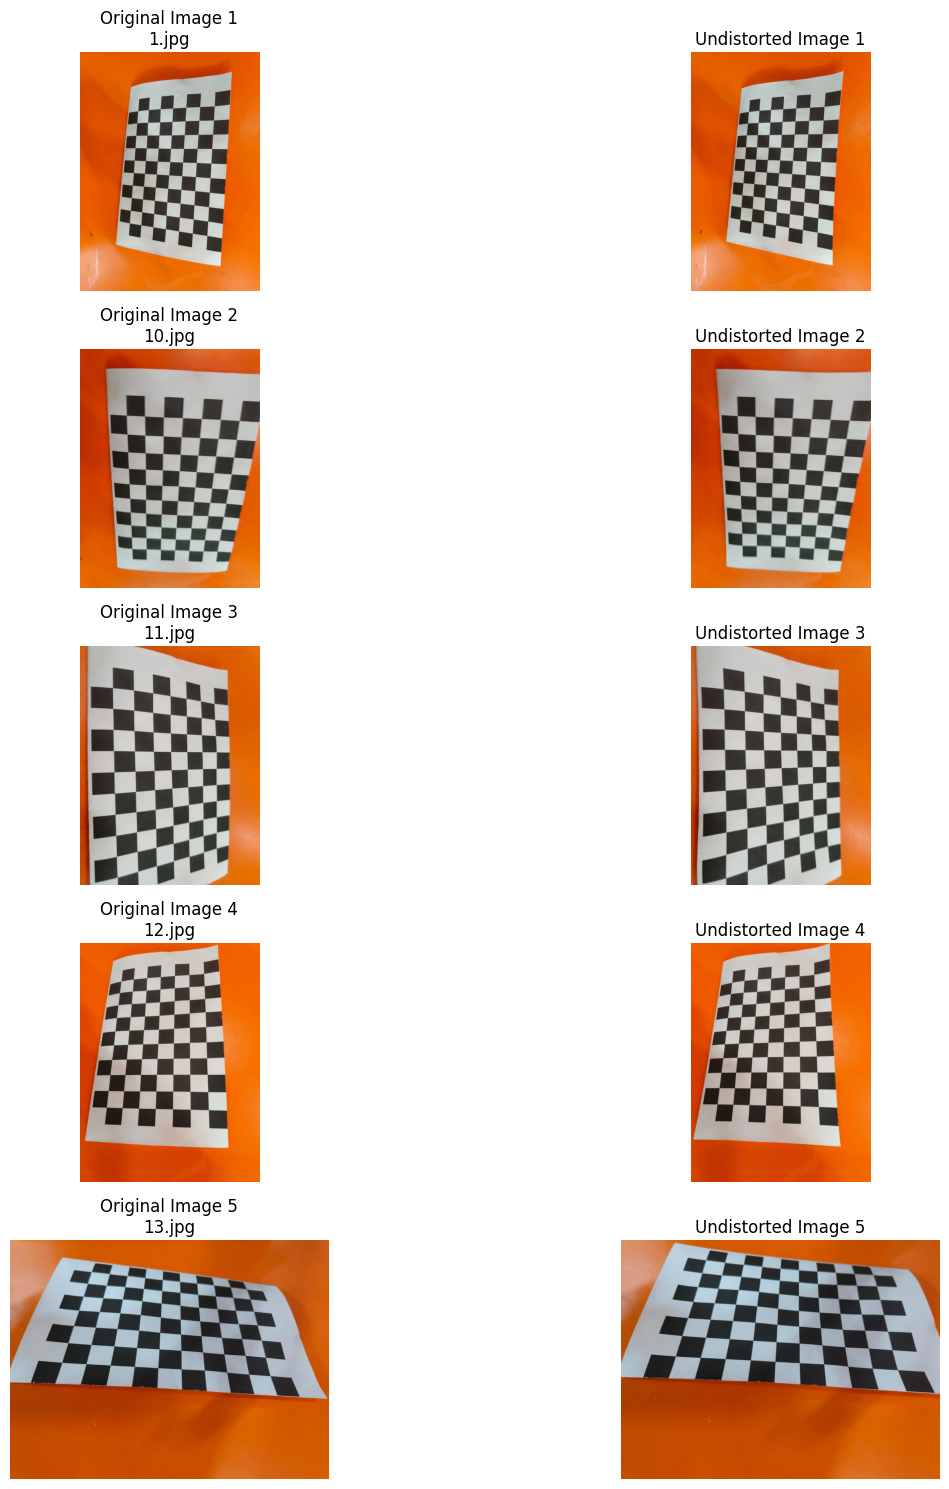


Comment on Distortion:
Observe the images, especially near the edges. Lines that appeared curved in the original image (due to radial distortion, often 'barrel' or 'pincushion') should appear straighter in the undistorted image. The effect is usually most pronounced for lines far from the image center.

--- Task 4: Reprojection Error ---
Reprojection Errors per image (pixels): ['0.1847', '0.2633', '0.4453', '0.1856', '0.8421', '0.1628', '0.0736', '0.7004', '0.2203', '0.1856', '0.1244', '0.2950', '0.1628', '0.2714', '0.0925', '0.1300', '0.0881', '0.1244', '0.1129', '0.2714', '0.1750', '0.3019', '0.0485', '0.2147', '0.6085']
Mean Reprojection Error: 0.2514 pixels
Std Dev Reprojection Error: 0.1948 pixels

Generating and displaying reprojection error plot...
Saved reprojection error plot to reprojection_errors.png


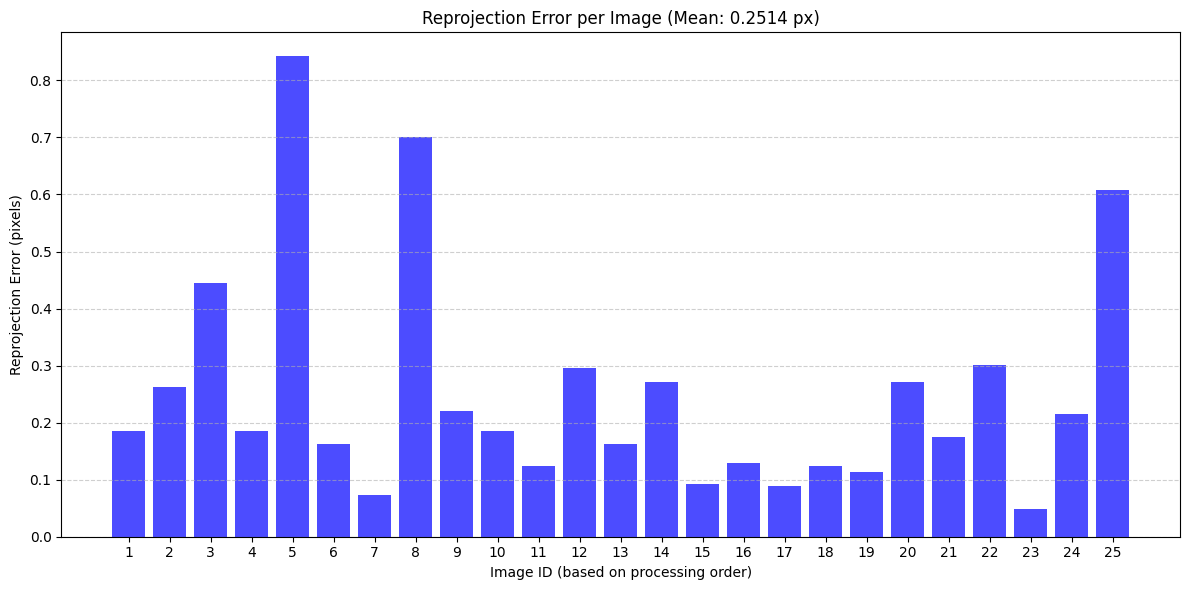


--- Task 2: Extrinsic Parameters (First 2 Valid Images) ---

Image 1 (1.jpg):
Rotation Matrix (R):
[[-0.0618 -0.9432  0.3263]
 [ 0.9974 -0.0458  0.0564]
 [-0.0383  0.3289  0.9436]]
Translation Vector (t):
[ 3.0379 -4.2087 12.3427]
(These represent the transformation from World/Chessboard coordinates to Camera coordinates)

Image 2 (10.jpg):
Rotation Matrix (R):
[[-0.0364 -0.9986  0.038 ]
 [ 0.9473 -0.0465 -0.317 ]
 [ 0.3183  0.0244  0.9477]]
Translation Vector (t):
[ 3.6431 -2.2593  9.3406]
(These represent the transformation from World/Chessboard coordinates to Camera coordinates)

--- Task 5: Corner Detection & Reprojection Visualization ---
Generating and displaying reprojection visualizations (saved to self-clicked_reprojection_images/)...
(Detected corners in green, Reprojected corners in red circles)


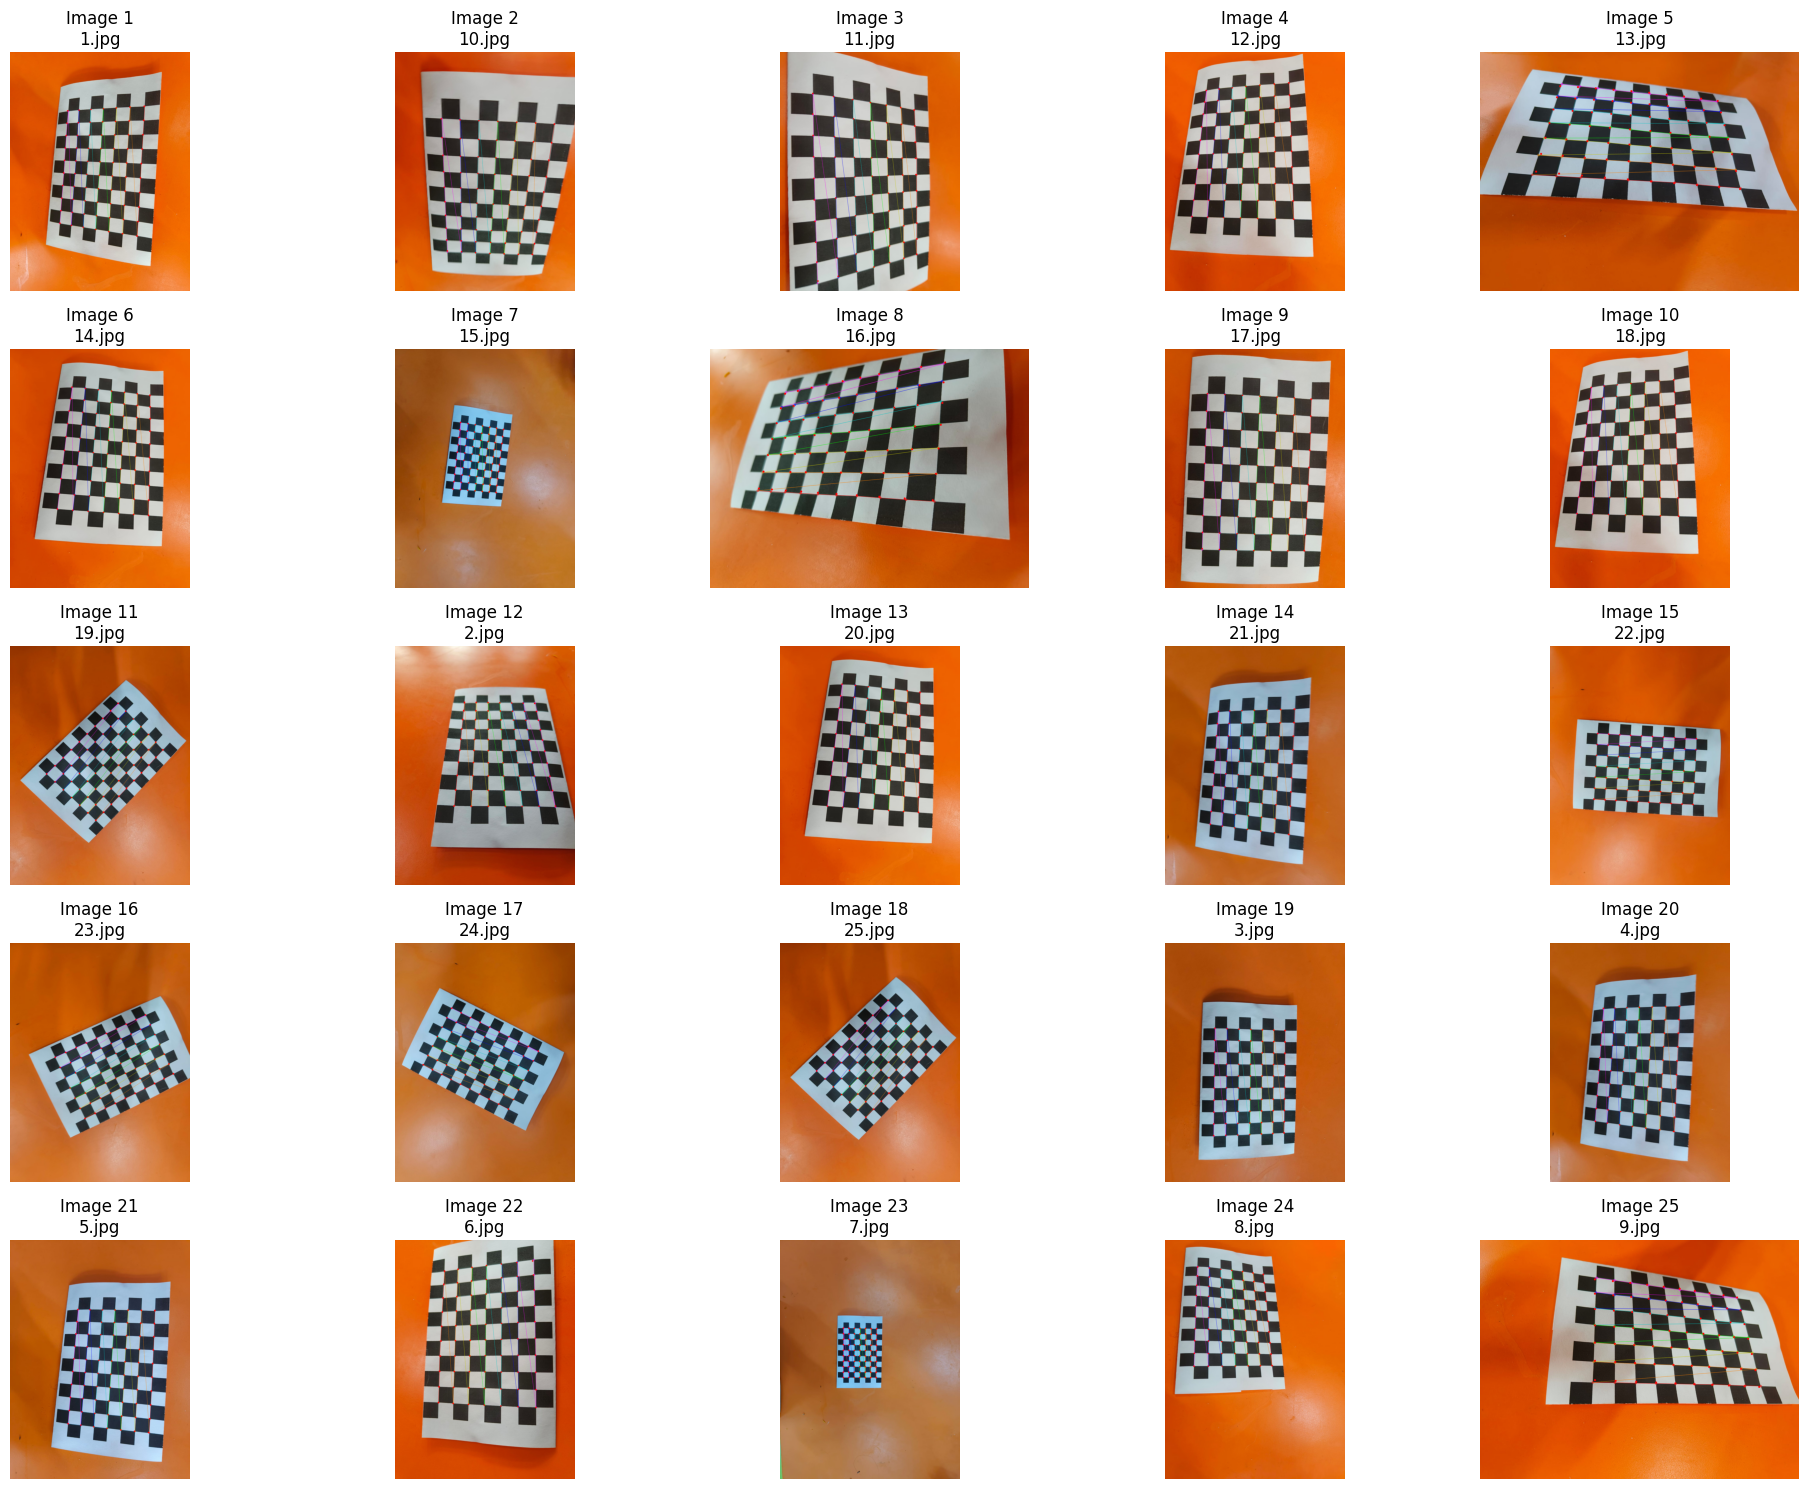


Comment on Reprojection Error Calculation:
The reprojection error for a single image is calculated as follows:
1. Take the known 3D object points (objp) of the chessboard corners.
2. Use the estimated intrinsic matrix (mtx), distortion coefficients (dist),
   and the estimated extrinsic parameters (rvecs[i], tvecs[i]) for that specific image's pose.
3. Project the 3D points onto the 2D image plane using these parameters via cv2.projectPoints(). This gives the 'reprojected' 2D points.
4. Calculate the Euclidean distance between each reprojected 2D point and the corresponding original 2D corner point detected in the image (imgpoints[i]).
5. The error reported for the image is typically the average (or root-mean-square) of these distances over all corners in that image.

--- Task 6: Checkerboard Plane Normals (in Camera Frame) ---
Normal vector (Z-axis of checkerboard) expressed in camera coordinates for each image:

--- Generating JSON Output ---
Successfully saved calibration results t

In [3]:
import numpy as np
import cv2
import os
import glob
import json
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
# Chessboard dimensions (number of inner corners)
nx = 10  # columns (horizontal)
ny = 7  # rows (vertical)
square_size = 1.0  # in some units (scale is arbitrary for intrinsic calibration)

# Directories and output files
# --- IMPORTANT: UPDATE THIS PATH ---
# Use the specific path provided by your environment (e.g., Kaggle, Colab, local machine)
# --- ---

# Directories and output files
image_dir = '/kaggle/input/self-clicked-chessboard/self_clicked_chessboard'  # Update this path!
output_json = 'self-clicked_calibration_results.json'
output_undistorted_dir = 'self-clicked_undistorted_images/'
output_reproj_dir = 'self-clicked_reprojection_images/'

# Create output directories
os.makedirs(output_undistorted_dir, exist_ok=True)
os.makedirs(output_reproj_dir, exist_ok=True)

# --- Image Loading ---
# Load images (support .jpg, .jpeg, .png, .JPG, .JPEG, .PNG)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
images = []
for ext in image_extensions:
    # Make search case-insensitive if needed (though glob usually is on Linux/Mac)
    images += glob.glob(os.path.join(image_dir, ext))
    # Optional: Add case-insensitive variants if glob isn't working as expected
    # images += glob.glob(os.path.join(image_dir, ext.upper()))

# Recursive search (if images are in subdirectories) - uncomment if needed
# if not images:
#     print(f"No images found directly in {image_dir}, searching subdirectories...")
#     images = []
#     for root, _, files in os.walk(image_dir):
#         for file in files:
#             if any(file.lower().endswith(ext.lower().replace('*','')) for ext in image_extensions):
#                 images.append(os.path.join(root, file))

# Debug: Print found files
print(f"Searching in directory: {image_dir}")
# Sort images for consistent ordering if needed (glob doesn't guarantee order)
images.sort()
print(f"Found {len(images)} files. First few: {images[:5]}")


# Check if any images were found
if not images:
    raise ValueError(f"No images found in the specified directory: {image_dir}. Please check the path.")

# --- Corner Detection ---
# Prepare object points (same for all images)
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) * square_size

objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane
valid_images_filenames = [] # Keep track of images where corners were found

print("Processing images for corner detection...")
# Find chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    if img is None:
        print(f"Skipping invalid or unreadable image: {fname}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        # Refine corner positions
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        valid_images_filenames.append(fname) # Store filename for later use
        # print(f"Corners found in: {os.path.basename(fname)}") # Optional: uncomment for verbose output
    else:
        print(f"Failed to detect corners in {os.path.basename(fname)}")

# Ensure we have enough valid images
num_valid_images = len(objpoints)
print(f"\nFound corners in {num_valid_images} out of {len(images)} images.")
if num_valid_images < 3: # Need at least 3 for calibration, ideally more (like 20+)
    raise ValueError(f"Need at least 3 valid images for calibration, found only {num_valid_images}.")
if num_valid_images < 25:
     print(f"Warning: Only found {num_valid_images} valid images, less than the desired 25.")


# --- Calibration ---
# Get image shape from first valid image
first_valid_image_path = valid_images_filenames[0]
first_img = cv2.imread(first_valid_image_path)
if first_img is None:
     raise ValueError(f"Failed to read the first valid image: {first_valid_image_path}")
image_size = first_img.shape[:2][::-1] # (width, height) from (height, width)

print(f"\nPerforming calibration using {num_valid_images} images with size {image_size}...")
# Calibration
# Pass None for cameraMatrix and distCoeffs initially
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, image_size, None, None
)

if not ret:
    raise RuntimeError("Camera calibration failed.")

print("Calibration successful.")

# --- Task 1: Intrinsic Parameters ---
print("\n--- Task 1: Intrinsic Parameters ---")
fx = mtx[0, 0]
fy = mtx[1, 1]
skew = mtx[0, 1]
cx = mtx[0, 2]
cy = mtx[1, 2]
print(f"Intrinsic Matrix (K):\n{mtx.round(4)}")
print(f"Focal Length (fx, fy): {fx:.2f}, {fy:.2f} pixels")
print(f"Skew: {skew:.4f}")
print(f"Principal Point (cx, cy): {cx:.2f}, {cy:.2f} pixels")

# Note: Error estimates are not directly returned by calibrateCamera.
# They can be estimated if CALIB_RATIONAL_MODEL is used and standard deviations are returned,
# or through techniques like bootstrapping if needed, but are not standard output here.
print("Error estimates for intrinsics are not directly provided by this basic cv2.calibrateCamera call.")

# --- Task 3: Radial Distortion Coefficients & Undistortion ---
print("\n--- Task 3: Radial Distortion Coefficients & Undistortion ---")
# OpenCV returns k1, k2, p1, p2, k3[, k4, k5, k6]...
# The question asks for radial coefficients (k1, k2, k3 are the most common)
radial_dist = dist.flatten()[:3] # Get k1, k2, k3 if available
all_dist_coeffs = dist.flatten() # Get all coefficients
print(f"All Distortion Coefficients (k1, k2, p1, p2, k3,...): {all_dist_coeffs.round(4)}")
print(f"Radial Distortion Coefficients (k1, k2, k3): {radial_dist.round(4)}")

print(f"\nGenerating and displaying first 5 undistorted images (saved to {output_undistorted_dir})...")
num_undistort = min(5, num_valid_images) # Undistort up to 5 images, or fewer if less are valid
plt.figure(figsize=(15, 3 * num_undistort)) # Adjust figure size if needed
for i in range(num_undistort):
    fname = valid_images_filenames[i] # Use filenames of images where corners were found
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    # You can experiment with alpha: 0 crops more, 1 keeps all pixels
    # newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0, (w, h)) # Alternative: alpha=0

    # Undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

    # Crop the image based on ROI (optional, if alpha=1 leaves black borders you want removed)
    # x, y, w_roi, h_roi = roi
    # dst = dst[y:y+h_roi, x:x+w_roi]

    # Save the undistorted image
    save_path = os.path.join(output_undistorted_dir, f'undistorted_{i+1}_{os.path.basename(fname)}')
    cv2.imwrite(save_path, dst)
    # print(f"Saved undistorted image to {save_path}") # Optional verbose output

    # *** MODIFICATION: Display the undistorted image ***
    plt.subplot(num_undistort, 2, 2*i + 1) # Show original side-by-side
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image {i+1}\n{os.path.basename(fname)}')
    plt.axis('off')

    plt.subplot(num_undistort, 2, 2*i + 2) # Show undistorted
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.title(f'Undistorted Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show() # Display the figure with all undistorted images

print("\nComment on Distortion:")
print("Observe the images, especially near the edges. Lines that appeared curved in the original image (due to radial distortion, often 'barrel' or 'pincushion') should appear straighter in the undistorted image. The effect is usually most pronounced for lines far from the image center.")

# --- Task 4: Reprojection Error ---
print("\n--- Task 4: Reprojection Error ---")
errors = []
for i in range(num_valid_images):
    # Project 3D points back to 2D image plane using calculated parameters
    img_points_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    # Calculate the error (Euclidean distance between detected and reprojected points)
    # Use NORM_L2 per point (RMSE - Root Mean Squared Error) is common
    error = cv2.norm(imgpoints[i], img_points_reproj, cv2.NORM_L2) / len(img_points_reproj)
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"Reprojection Errors per image (pixels): {[f'{e:.4f}' for e in errors]}")
print(f"Mean Reprojection Error: {mean_error:.4f} pixels")
print(f"Std Dev Reprojection Error: {std_error:.4f} pixels")

# Plot reprojection errors
print("\nGenerating and displaying reprojection error plot...")
plt.figure(figsize=(12, 6))
img_indices = range(1, num_valid_images + 1)
plt.bar(img_indices, errors, color='blue', alpha=0.7)
plt.xlabel('Image ID (based on processing order)')
plt.ylabel('Reprojection Error (pixels)')
plt.title(f'Reprojection Error per Image (Mean: {mean_error:.4f} px)')
plt.xticks(img_indices) # Ensure integer ticks for image IDs
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
save_path = 'reprojection_errors.png'
plt.savefig(save_path)
print(f"Saved reprojection error plot to {save_path}")

# *** MODIFICATION: Display the reprojection error plot ***
plt.show() # Display the plot


# --- Task 2: Extrinsic Parameters ---
print("\n--- Task 2: Extrinsic Parameters (First 2 Valid Images) ---")
num_extrinsic = min(2, num_valid_images)
for idx in range(num_extrinsic):
    R_mat, _ = cv2.Rodrigues(rvecs[idx]) # Convert Rodrigues vector to 3x3 rotation matrix
    t_vec = tvecs[idx].flatten()
    img_fname = os.path.basename(valid_images_filenames[idx])
    print(f"\nImage {idx+1} ({img_fname}):")
    print("Rotation Matrix (R):")
    print(R_mat.round(4))
    print("Translation Vector (t):")
    print(t_vec.round(4))
    print("(These represent the transformation from World/Chessboard coordinates to Camera coordinates)")

# --- Task 5: Corner Detection and Reprojection Visualization ---
print(f"\n--- Task 5: Corner Detection & Reprojection Visualization ---")
print(f"Generating and displaying reprojection visualizations (saved to {output_reproj_dir})...")
print("(Detected corners in green, Reprojected corners in red circles)")

# Determine layout for displaying multiple images (e.g., 5x5 grid for 25 images)
cols = 5
rows = int(np.ceil(num_valid_images / cols))
plt.figure(figsize=(cols * 4, rows * 3)) # Adjust size as needed

for i in range(num_valid_images):
    fname = valid_images_filenames[i]
    img = cv2.imread(fname)
    if img is None:
        print(f"Warning: Could not read image {fname} again for visualization.")
        continue

    # Draw original detected corners (refined) - Green color
    cv2.drawChessboardCorners(img, (nx, ny), imgpoints[i], True)

    # Reproject 3D points to 2D image plane
    img_points_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    img_points_reproj_int = np.int32(img_points_reproj.reshape(-1, 2)) # Reshape and convert for drawing

    # Draw reprojected points - Red circles
    for pt in img_points_reproj_int:
        # Need to ensure pt is a tuple for cv2.circle
        cv2.circle(img, tuple(pt), radius=5, color=(0, 0, 255), thickness=-1) # Red (BGR)

    # Save the image with drawings
    save_path = os.path.join(output_reproj_dir, f'reproj_{i+1}_{os.path.basename(fname)}')
    cv2.imwrite(save_path, img)

    # *** MODIFICATION: Display the image with corners ***
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for plt
    plt.title(f'Image {i+1}\n{os.path.basename(fname)}')
    plt.axis('off')

# Adjust layout and show the figure containing all reprojection images
plt.tight_layout()
plt.show()


print("\nComment on Reprojection Error Calculation:")
print("The reprojection error for a single image is calculated as follows:")
print("1. Take the known 3D object points (objp) of the chessboard corners.")
print("2. Use the estimated intrinsic matrix (mtx), distortion coefficients (dist),")
print("   and the estimated extrinsic parameters (rvecs[i], tvecs[i]) for that specific image's pose.")
print("3. Project the 3D points onto the 2D image plane using these parameters via cv2.projectPoints(). This gives the 'reprojected' 2D points.")
print("4. Calculate the Euclidean distance between each reprojected 2D point and the corresponding original 2D corner point detected in the image (imgpoints[i]).")
print("5. The error reported for the image is typically the average (or root-mean-square) of these distances over all corners in that image.")

# --- Task 6: Checkerboard Plane Normals ---
print("\n--- Task 6: Checkerboard Plane Normals (in Camera Frame) ---")
normals_in_camera_frame = []
print("Normal vector (Z-axis of checkerboard) expressed in camera coordinates for each image:")
for i in range(num_valid_images):
    R_mat, _ = cv2.Rodrigues(rvecs[i])
    # The Z-axis of the world/checkerboard frame is [0, 0, 1].
    # Transformed into camera coordinates, this is R * [0, 0, 1]^T, which is simply the 3rd column of R.
    normal_cam = R_mat[:, 2]
    normals_in_camera_frame.append(normal_cam.tolist()) # Store as list for JSON
    # Optional: Print normals
    # img_fname = os.path.basename(valid_images_filenames[i])
    # print(f"Image {i+1} ({img_fname}): n_Ci = {normal_cam.round(4)}")

# --- JSON Output ---
print("\n--- Generating JSON Output ---")
# Prepare data dictionary
data = {
    "intrinsic_parameters": {
        "focal_length_pixels": [float(fx), float(fy)], # fx, fy
        "principal_point_pixels": [float(cx), float(cy)], # cx, cy
        "skew_coefficient": float(skew)
        # Assuming standard pinhole model + distortion; K matrix includes these.
    },
    "distortion_coefficients": {
        "radial_k1_k2_k3": radial_dist.tolist() if len(radial_dist) >= 3 else radial_dist.tolist() + [0.0]*(3-len(radial_dist)), # Ensure length 3
        "tangential_p1_p2": all_dist_coeffs[2:4].tolist() if len(all_dist_coeffs) >= 4 else [0.0, 0.0],
        "all_coeffs": all_dist_coeffs.tolist() # Include all for completeness
    },
    "reprojection_error_stats": {
        "mean_error_pixels": float(mean_error),
        "std_dev_error_pixels": float(std_error),
        "per_image_error_pixels": errors # Store individual errors too
    },
    "extrinsic_parameters": [] # Populate below
    # Task 6: Add normals if required in JSON (question didn't specify JSON for normals)
    # "checkerboard_normals_in_camera_frame": normals_in_camera_frame
}

# Populate extrinsic parameters for ALL valid images
for i in range(num_valid_images):
    R_mat, _ = cv2.Rodrigues(rvecs[i])
    t_vec = tvecs[i].flatten().tolist()
    entry = {
        "image_id": i + 1, # Sequential ID based on processing order
        "filename": os.path.basename(valid_images_filenames[i]), # Store filename for reference
        "rotation_matrix": R_mat.tolist(),
        "translation_vector_units": t_vec # Units relative to square_size
    }
    data["extrinsic_parameters"].append(entry)

# Add normals to JSON if needed (example)
data["checkerboard_normals_in_camera_frame"] = normals_in_camera_frame

# Write JSON file
try:
    with open(output_json, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Successfully saved calibration results to {output_json}")
except Exception as e:
    print(f"Error saving JSON file: {e}")

print("\n--- Script Finished ---")

In [4]:
import shutil

# Define the output zip file path
zip_path = "/kaggle/working/output_complete.zip"

# Zip the entire /kaggle/working/ directory
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', "/kaggle/working/")
    
# Confirm zip creation
print(f"Zipped output folder saved at: {zip_path}")


Zipped output folder saved at: /kaggle/working/output_complete.zip
